# Escogiendo hiperparametros: cross-validation

## Los datos


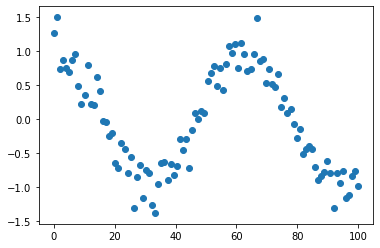

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 100

x = np.linspace(0, 100, n)
fx = np.cos(x/10)
y = fx +  np.random.normal(0, 0.2, n)

plt.scatter(x, y)
plt.show()

## Extraccion del test set

Extraemos el 30% de los datos para probar nuestro modelo.

70
30
70
30


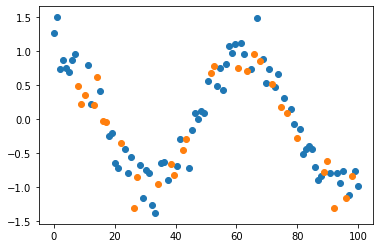

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.show()

## El modelo: smoothing splines

Este modelo encuentra curvas que se ajustan a los datos controlado por una variable de suavizacion.

Preparamos los datos para entrenamiento.

In [4]:
import pandas as pd

data_train = pd.DataFrame({
    "x": x_train,
    "y": y_train
})

data_test = pd.DataFrame({
    "x": x_test,
    "y": y_test
})

data_train = data_train.sort_values(by=["x"])
data_test = data_test.sort_values(by=["x"])
data_train
data_train.head()

,x,y
56,0.000000,1.258553
58,1.010101,1.495678
1,2.020202,0.727633
60,3.030303,0.865659
50,4.040404,0.754359


Ajustamos diferentes modelos con distintos parametros de suavizacion.

In [6]:
#!pip install csaps

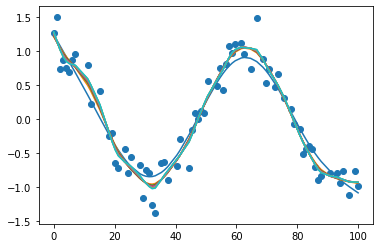

In [7]:
import csaps

def mse(preds, real):
  subs = np.subtract(real, preds)
  pows = np.power(subs, 2.0)

  return np.mean(pows)

plt.scatter(data_train.x, data_train.y)

ss = np.arange(0.001, 0.1, 0.01)
errors = []

for s in ss:
  model = csaps.UnivariateCubicSmoothingSpline(data_train.x, data_train.y, smooth=s)
  pred_ys = model(data_test.x)

  plt.plot(data_train.x, model(data_train.x))

  error = mse(pred_ys, data_test.y)
  errors.append(error)

s     error
0  0.001  0.051643
1  0.011  0.051218
2  0.021  0.053470
3  0.031  0.055147
4  0.041  0.056527
5  0.051  0.057714
6  0.061  0.058763
7  0.071  0.059707
8  0.081  0.060567
9  0.091  0.061360


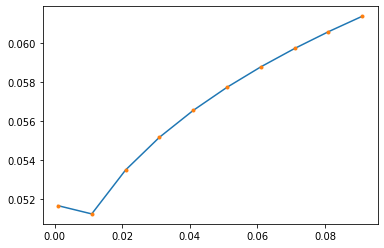

In [8]:
errors_data = pd.DataFrame({
    "s": ss,
    "error": errors
})

print(errors_data)

plt.plot(ss, errors, '-', ss, errors, '.')
plt.show()